In [4]:
import pandas as pd
import matplotlib as plt
import sklearn as sk

atac_raw = pd.read_csv("data/ATAC.csv")


We import our ATAC dataset and we explore OCR across cell types.

In [5]:
atac_raw.head()

,ImmGenATAC1219.peakID,chrom,Summit,mm10.60way.phastCons_scores,_-log10_bestPvalue,Included.in.systematic.analysis,TSS,genes.within.100Kb,LTHSC.34-.BM,LTHSC.34+.BM,...,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,DC.103+11b+.SI,DC.103+11b-.SI,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
0,ImmGenATAC1219.peak_1,chr1,3020786,0.00,0.56,NaN,NaN,NaN,0.41,0.71,...,0.10,0.10,3.19,1.37,0.52,1.27,0.10,0.57,3.27,1.41
1,ImmGenATAC1219.peak_2,chr1,3087226,0.00,0.50,NaN,NaN,NaN,0.41,1.64,...,1.70,0.10,1.41,0.47,0.11,0.92,0.98,2.16,2.34,0.94
2,ImmGenATAC1219.peak_3,chr1,3120109,0.07,10.80,1.0,NaN,NaN,2.36,0.10,...,0.87,0.54,2.72,0.95,0.11,63.38,8.92,1.33,1.04,0.11
3,ImmGenATAC1219.peak_4,chr1,3121485,0.15,3.02,1.0,NaN,NaN,0.41,0.10,...,0.44,1.83,0.66,0.11,0.92,13.50,0.98,1.28,1.04,0.11
4,ImmGenATAC1219.peak_5,chr1,3372787,0.03,1.31,NaN,NaN,NaN,0.41,0.10,...,0.44,0.10,0.66,1.79,0.51,0.92,0.75,1.33,1.61,4.50


In [31]:
atac_raw.columns

Index(['ImmGenATAC1219.peakID', 'chrom', 'Summit',
       'mm10.60way.phastCons_scores', '_-log10_bestPvalue',
       'Included.in.systematic.analysis', 'TSS', 'genes.within.100Kb',
       'LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM',
       'proB.CLP.BM', 'proB.FrA.BM', 'proB.FrBC.BM', 'preB.FrD.BM', 'B.FrE.BM',
       'B1b.PC', 'B.T1.Sp', 'B.T2.Sp', 'B.T3.Sp', 'B.Sp', 'B.Fem.Sp',
       'B.MZ.Sp', 'B.Fo.Sp', 'B.mem.Sp', 'B.GC.CB.Sp', 'B.GC.CC.Sp', 'B.PB.Sp',
       'B.PC.Sp', 'B.PC.BM', 'preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th',
       'preT.DN3.Th', 'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th', 'T.4.Th', 'T.8.Th',
       'T.4.Nve.Sp', 'T.4.Nve.Fem.Sp', 'T.8.Nve.Sp', 'T.4.Sp.aCD3+CD40.18hr',
       'Treg.4.FP3+.Nrplo.Co', 'Treg.4.25hi.Sp', 'T8.TN.P14.Sp',
       'T8.IEL.LCMV.d7.SI', 'T8.TE.LCMV.d7.Sp', 'T8.MP.LCMV.d7.Sp',
       'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'NKT.Sp',
       'NKT.Sp.LPS.3hr', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d',
       'Tgd.g2+d17.24a+.Th',

In [6]:
atac_ilc = atac_raw[['NK.27+11b-.BM', 'NK.27+11b+.BM', 'NK.27-11b+.BM', 'NK.27+11b-.Sp',
       'NK.27+11b+.Sp', 'NK.27-11b+.Sp', 'ILC2.SI', 'ILC3.NKp46-CCR6-.SI',
       'ILC3.NKp46+.SI', 'ILC3.CCR6+.SI']]

In [33]:
atac_ilc.head

<bound method NDFrame.head of         NK.27+11b-.BM  NK.27+11b+.BM  NK.27-11b+.BM  NK.27+11b-.Sp  \
0                0.82           0.22           2.00           0.81   
1                1.46           0.22           0.12           0.14   
2                0.20           1.00           0.12           0.14   
3                1.72           1.07           0.73           0.76   
4                0.20           0.22           0.12           0.14   
...               ...            ...            ...            ...   
512590           6.33           2.48           8.34           2.04   
512591           4.82           4.98           6.55           4.48   
512592           2.48           2.29           2.00           1.43   
512593           1.72           0.22           0.12           0.14   
512594           2.48           0.22           1.28           0.14   

        NK.27+11b+.Sp  NK.27-11b+.Sp  ILC2.SI  ILC3.NKp46-CCR6-.SI  \
0                2.43           1.27     1.79              

In [34]:
atac_ilc.columns

Index(['NK.27+11b-.BM', 'NK.27+11b+.BM', 'NK.27-11b+.BM', 'NK.27+11b-.Sp',
       'NK.27+11b+.Sp', 'NK.27-11b+.Sp', 'ILC2.SI', 'ILC3.NKp46-CCR6-.SI',
       'ILC3.NKp46+.SI', 'ILC3.CCR6+.SI'],
      dtype='object')

In [35]:
len(atac_ilc.columns)

10

We have selected the only relevant cell lineages (10 populations)

In [36]:
print(atac_ilc.isnull().sum())

NK.27+11b-.BM          0
NK.27+11b+.BM          0
NK.27-11b+.BM          0
NK.27+11b-.Sp          0
NK.27+11b+.Sp          0
NK.27-11b+.Sp          0
ILC2.SI                0
ILC3.NKp46-CCR6-.SI    0
ILC3.NKp46+.SI         0
ILC3.CCR6+.SI          0
dtype: int64


In [37]:
atac_raw = atac_raw.dropna()

our data is ready to work with

In [38]:
print(atac_ilc.shape)

(512595, 10)


that means we have 512.595 peaks of 10 populations. so far we have clustered PEAKS and displayed the results likely across 2 cell populations. What that could tells us- groups of peaks with similar accessibility profiles across samples OR candidate regulatory regions that respond similarly to cell type, condition, or time point. What we could hypothesize for now - 2 distinct clusters across 2 samples. Diagonal shape suggest co-regualtion across the the 2 cell types, or at least same role in different cells whic is to be expected. However the graph is unreliable so we have to take steps to correct that and use different methods. let's jump to alternative evaluations and/or dimension reduction.

In [39]:
import scanpy as sc 
import sklearn as sk
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA


/var/folders/vh/rffjtjt916gdtb214wntxwb80000gn/T/ipykernel_36471/1705319978.py:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], cmap='viridis', alpha=0.7)


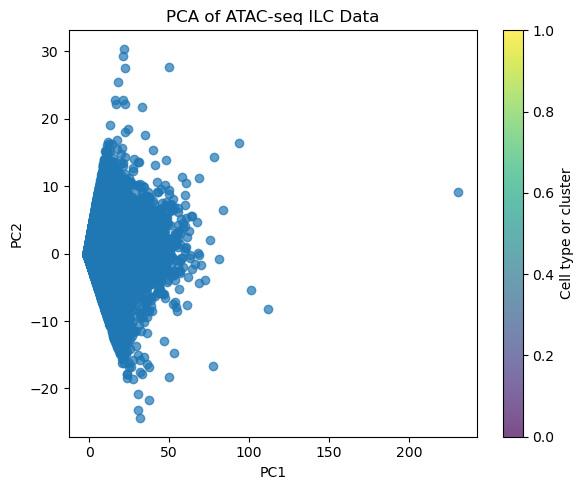

In [40]:
# Assuming atac_ilc is a DataFrame with cells × peaks
X = atac_ilc.values

# Standardize features
X_scaled = StandardScaler().fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

# Create a DataFrame for easy plotting
df_pca = pd.DataFrame(components, columns=['PC1', 'PC2'])

# Optional: Add labels (e.g., cell types)
# df_pca['label'] = your_labels  # Uncomment and set your labels

# Plot
plt.figure(figsize=(6, 5))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], cmap='viridis', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of ATAC-seq ILC Data')
plt.colorbar(scatter, label='Cell type or cluster')
plt.tight_layout()
plt.show()

PC1 shows low variability, while PC2 shows high variability, indicating that the second principal component captures more of the variance in the data. This suggests that the second component is more informative for distinguishing between different cell types or states in the ATAC-seq data. 

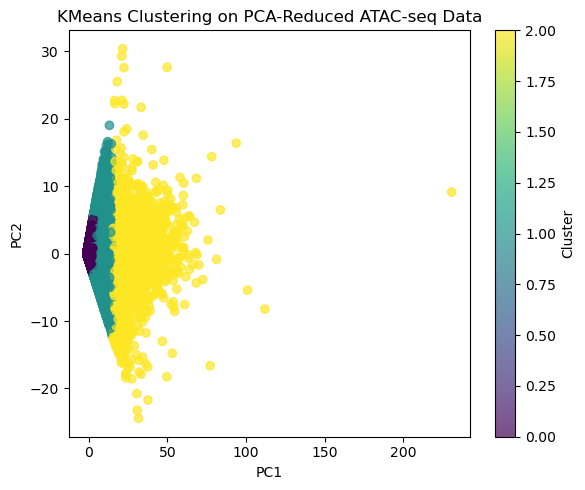

In [41]:
from sklearn.cluster import KMeans

# Run KMeans on PCA-reduced data
k = 3  # or any number of clusters you want
kmeans_pca = KMeans(n_clusters=k, random_state=42)
pca_labels = kmeans_pca.fit_predict(df_pca[['PC1', 'PC2']])

# Add to DataFrame
df_pca['Cluster'] = pca_labels

# Plot with cluster colors
plt.figure(figsize=(6, 5))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=pca_labels, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clustering on PCA-Reduced ATAC-seq Data')
plt.tight_layout()
plt.show()


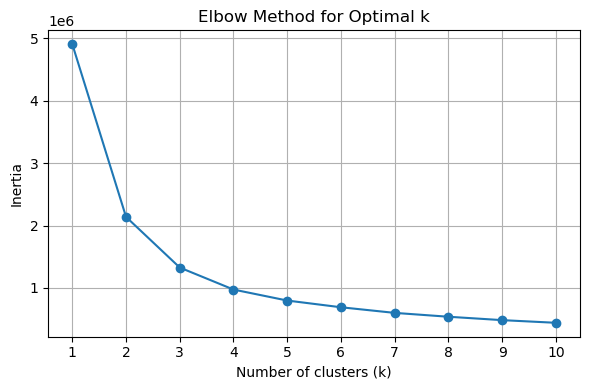

In [28]:
inertias = []
k_values = range(1, 11)  # Test k from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca[['PC1', 'PC2']])
    inertias.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.show()


The elbow method confirms that 3 clusters are most optimal. The K-means on the PCA reduced data shows uniform peaks across cell types with only a few far-right points, implying possible super enhancers (PC 1)

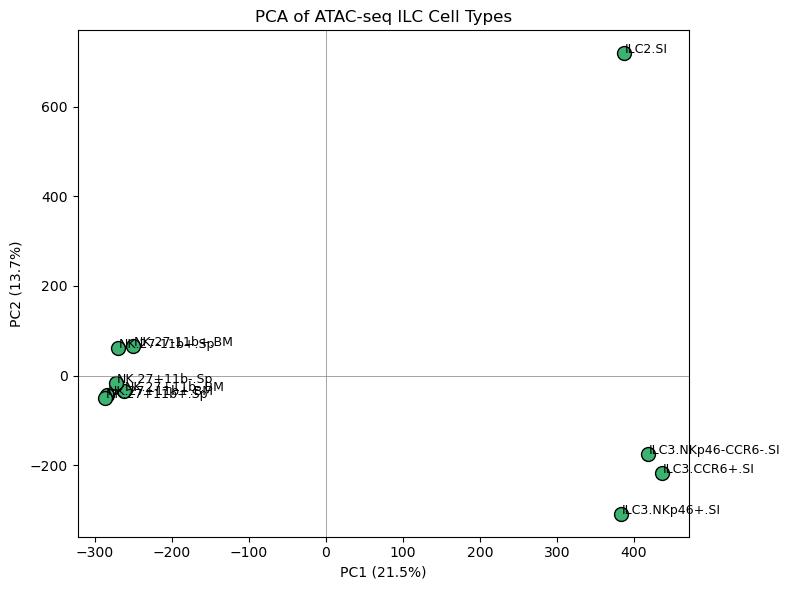

In [7]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Internally transpose to get: rows = samples (cell types), columns = peaks
X = atac_ilc.T.values

# Step 2: Standardize features
X_scaled = StandardScaler().fit_transform(X)

# Step 3: PCA
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

# Step 4: Wrap in DataFrame
df_pca = pd.DataFrame(components, columns=['PC1', 'PC2'])
df_pca['cell_type'] = atac_ilc.columns  # original column names

# Step 5: Plot
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], color='mediumseagreen', s=100, edgecolor='black')

# Annotate points
for i, row in df_pca.iterrows():
    plt.text(row['PC1'] + 1, row['PC2'], row['cell_type'], fontsize=9)

# Final touches
plt.title('PCA of ATAC-seq ILC Cell Types')
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.tight_layout()
plt.show()


The cell lineages clustered based on their peaks. PC1 clearly separates NK and ILC cells, while PC2 distinguishes ILC2 from ILC3.

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Your matrix: rows = peaks, columns = cell types
X = atac_ilc.values

# Step 2: Standardize
X_scaled = StandardScaler().fit_transform(X)

# Step 3: PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)  # shape: (n_peaks, 2)

# Step 4: Wrap results into a DataFrame
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['peak'] = atac_ilc.index  # assuming peaks are in the index

# Step 5: Sort by absolute PC2 score
top_pc2_peaks = df_pca.reindex(df_pca['PC2'].abs().sort_values(ascending=False).index)

# Step 6: Show top 10 peaks driving PC2
print(top_pc2_peaks.head(10))


              PC1        PC2    peak
340824  21.504968  30.374629  340824
340823  20.979631  29.290492  340823
501892  49.824958  27.634050  501892
298875  22.397979  27.580555  298875
340825  18.079616  25.500974  340825
161186  31.699334 -24.415896  161186
56524   30.815159 -23.228859   56524
151727  21.192235  22.730306  151727
480021  16.418182  22.708954  480021
111356  16.662866  22.233174  111356


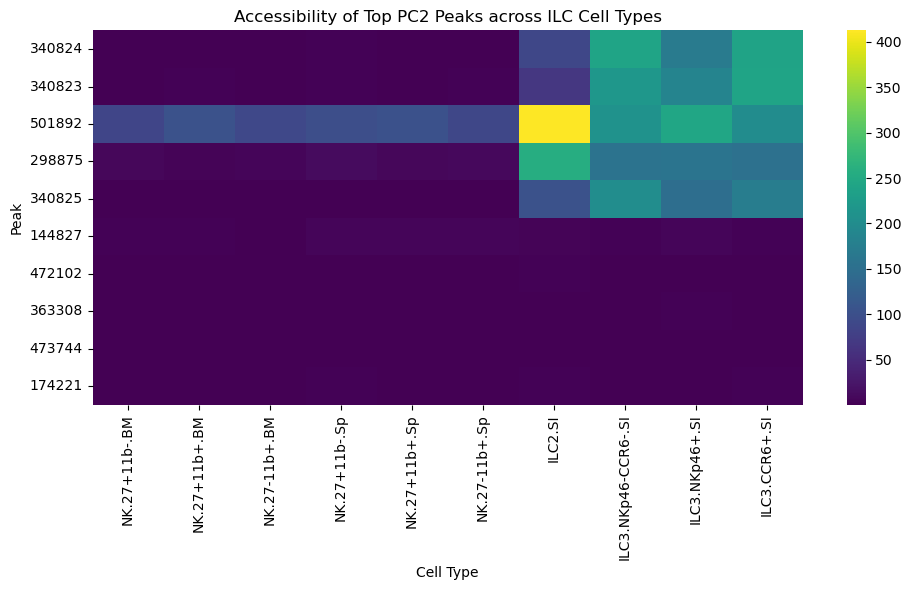

In [9]:
# Select top N peaks from both ends
top_pos = top_pc2_peaks.head(5)['peak']
top_neg = top_pc2_peaks.tail(5)['peak']
selected_peaks = pd.concat([top_pos, top_neg])

# Extract accessibility values
df_selected = atac_ilc.loc[selected_peaks]

# Plot as heatmap
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(df_selected, cmap='viridis', yticklabels=True, xticklabels=True)
plt.title("Accessibility of Top PC2 Peaks across ILC Cell Types")
plt.xlabel("Cell Type")
plt.ylabel("Peak")
plt.tight_layout()
plt.show()


This heatmap shows the most highly expressed peaks across different cell lineages. In further analysis will trace the peaks to specific genes and identify their distances from TSS to predict if they are correspond to promoters or enhancers.
